# **Training Artificial Neural Networks on Numerical Data**

## **Data Preparation and Processing**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Import required libraries
# For sklearn to work imports (pip install scikit-learn)
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
# Imported from "Keras with TensorFlow - Data Processing for Neural Network Training" Video
# Video Link: https://www.youtube.com/watch?v=3FwGDUD_ZuQ&list=PLkUrsn8FkQFb5Gr_CY7HQErZRr6mPb-2q&index=4

# Recursive File Listing Script
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## **Empty List for Training Labels and Samples**

In [2]:
train_labels = []
train_samples = []

Example data:

• An experiemental drug was tested on individuals from ages 13 to 100 in a clinical trial.

• The trial had 2100 participants. Half were under 65 years old, half were 65 years or older.

• 95% of patients 65 or older experienced side effects.

• 95% of patients under 65 experienced no side effects.


**For loop for creating the Dataset Above**

In [4]:
for i in range(50):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    #The 95% older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)


In [5]:
for i in train_samples:
    print(i)

50
89
43
73
39
71
49
79
33
92
40
95
27
86
55
81
45
75
46
67
51
86
16
68
45
87
28
86
25
74
18
75
39
91
47
85
33
74
26
83
61
89
60
69
27
72
62
65
24
73
43
93
63
90
28
65
41
80
56
69
24
74
20
90
45
67
28
96
18
73
32
70
56
67
23
65
13
72
33
92
35
69
24
84
26
99
42
69
48
91
52
90
53
72
51
68
15
65
33
86
60
93
39
77
63
65
33
75
39
93
24
100
64
84
37
99
53
87
18
77
29
98
40
94
41
72
27
96
45
72
45
99
13
88
61
70
52
100
44
97
46
84
36
96
41
81
14
80
19
84
42
99
32
95
49
89
20
92
35
87
13
82
38
93
57
79
48
98
39
91
30
65
15
68
20
71
28
87
49
89
37
75
55
76
25
82
16
90
29
97
57
65
28
79
50
90
25
71
27
94
41
80
61
80
16
77
47
89
56
71
41
83
57
90
48
72
34
100
60
71
38
75
18
66
21
97
26
77
24
75
18
82
62
78
56
80
45
98
40
97
47
84
59
70
47
79
33
97
24
99
42
75
34
82
21
76
36
69
39
87
15
72
52
85
24
68
15
72
13
72
59
94
48
98
54
75
57
74
44
79
39
76
21
81
38
94
53
67
56
94
23
97
31
100
38
96
53
96
15
94
36
77
32
73
54
82
19
86
43
90
43
80
14
69
58
80
45
80
46
65
31
95
30
69
55
72
53
96
25
79
51
86


In [6]:
# To see the corresponding Labels

for i in train_labels:
    print(i)

1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [7]:
# Convert both trains samples and train labels into numpy arrays

train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [8]:
# Scale down the data from (13-100) to (0-1)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [9]:
#print scaled data
for i in scaled_train_samples:
    print(i)

[0.67816092]
[0.77011494]
[0.47126437]
[0.7816092]
[0.71264368]
[0.40229885]
[0.3908046]
[0.02298851]
[0.37931034]
[0.71264368]
[0.55172414]
[0.18390805]
[0.70114943]
[0.68965517]
[0.2183908]
[0.26436782]
[0.47126437]
[0.44827586]
[0.75862069]
[0.67816092]
[0.81609195]
[0.44827586]
[0.67816092]
[0.45977011]
[0.59770115]
[0.25287356]
[0.22988506]
[0.93103448]
[0.34482759]
[0.96551724]
[0.91954023]
[0.27586207]
[0.59770115]
[0.71264368]
[0.]
[0.62068966]
[0.96551724]
[0.91954023]
[0.29885057]
[0.90804598]
[0.66666667]
[0.48275862]
[0.49425287]
[0.70114943]
[0.56321839]
[0.16091954]
[0.13793103]
[0.91954023]
[0.52873563]
[0.26436782]
[0.71264368]
[0.34482759]
[0.04597701]
[0.05747126]
[0.36781609]
[0.56321839]
[0.62068966]
[0.63218391]
[0.24137931]
[0.96551724]
[0.12643678]
[0.81609195]
[0.79310345]
[0.11494253]
[0.96551724]
[0.27586207]
[0.75862069]
[0.43678161]
[0.86206897]
[0.68965517]
[0.06896552]
[0.]
[0.35632184]
[0.59770115]
[0.25287356]
[0.75862069]
[0.37931034]
[0.67816092]
[0.60

## **Simple tf.keras Sequential Model**

In [10]:
# Imported from "Create an Artificial Neural Network with TensorFlow's Keras API" Video
# Video Link: https://www.youtube.com/watch?v=HrfrN3hn7QE&list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL&index=4
# If tensorflow import doesnt work, try pip install --upgrade tensorflow
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense


# Imported from "Train an Artificial Neural Network with TensorFlow's Keras API" Video
# Video Link: https://www.youtube.com/watch?v=I8eI4ZhcYdM&list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL&index=5
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy



In [11]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Prepares the model for training

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## *Validation Split Integration and Explanation*

In [14]:
# Training occurs using this fit function

model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

# Explanation for validation_split from the video "Build a Validation Set With TensorFlow's Keras API"
# Video Link: https://www.youtube.com/watch?v=U8Ixc2OLSkQ&list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL&index=6

# Validation Split
    # The validation_split parameter in the fit method above which specifies how much of the training data 
    # should be used for validation. For example, if validation_split=0.1, it means that 10% of the training data will 
    # be set aside for validation, and the remaining 90% will be used for actual training.

# Validation Set
    # A validation set is a portion of a dataset that is used to evaluate a model's performance during training,
    # but is not used for actual training. It serves as a benchmark to assess how well the model is likely to perform on new, unseen data.



Epoch 1/30
378/378 - 2s - loss: 0.6825 - accuracy: 0.4958 - val_loss: 0.6442 - val_accuracy: 0.6143 - 2s/epoch - 5ms/step
Epoch 2/30
378/378 - 1s - loss: 0.6246 - accuracy: 0.6307 - val_loss: 0.5919 - val_accuracy: 0.6857 - 639ms/epoch - 2ms/step
Epoch 3/30
378/378 - 1s - loss: 0.5770 - accuracy: 0.7085 - val_loss: 0.5417 - val_accuracy: 0.7405 - 685ms/epoch - 2ms/step
Epoch 4/30
378/378 - 1s - loss: 0.5299 - accuracy: 0.7701 - val_loss: 0.4937 - val_accuracy: 0.8024 - 669ms/epoch - 2ms/step
Epoch 5/30
378/378 - 1s - loss: 0.4795 - accuracy: 0.8257 - val_loss: 0.4417 - val_accuracy: 0.8405 - 665ms/epoch - 2ms/step
Epoch 6/30
378/378 - 1s - loss: 0.4335 - accuracy: 0.8534 - val_loss: 0.3979 - val_accuracy: 0.8738 - 663ms/epoch - 2ms/step
Epoch 7/30
378/378 - 1s - loss: 0.3941 - accuracy: 0.8825 - val_loss: 0.3598 - val_accuracy: 0.9071 - 648ms/epoch - 2ms/step
Epoch 8/30
378/378 - 1s - loss: 0.3615 - accuracy: 0.9003 - val_loss: 0.3285 - val_accuracy: 0.9190 - 658ms/epoch - 2ms/step
Epo

## **Preprocess Test Dataset**

In [16]:
# Empty List for Test Labels and Samples
test_labels = []
test_samples = []

In [19]:
for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    #The 95% older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [20]:
# Making the numpy array format and shuffling the data
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [21]:
# Scaling the data
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

# **Neural Network Predictions with TensorFlow's Keras API**

From https://www.youtube.com/watch?v=q-HkgmJ4aR8&list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL&index=7

## **Predict**

In [22]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

# model.predict(): This method is used to generate predictions using a trained neural network model. 
# In this case, it's using the model to make predictions on the input data scaled_test_samples.

In [23]:
for i in predictions:
    print(i)

# This loop iterates over each prediction in predictions and prints it. It's a way to visually inspect the model's output for each test sample.

[0.02382491 0.97617507]
[0.01288129 0.9871187 ]
[0.94701374 0.05298622]
[0.07004992 0.92995006]
[0.9580817  0.04191824]
[0.26748553 0.7325145 ]
[0.9579173  0.04208274]
[0.35145968 0.6485403 ]
[0.6391627  0.36083725]
[0.95080423 0.04919576]
[0.68333185 0.31666812]
[0.91199696 0.08800308]
[0.02382491 0.97617507]
[0.95781094 0.04218908]
[0.76204306 0.23795691]
[0.9581896  0.04181042]
[0.95709735 0.0429027 ]
[0.59250677 0.40749326]
[0.958243   0.04175701]
[0.00692879 0.99307126]
[0.00888315 0.9911169 ]
[0.9525308 0.0474692]
[0.8527198  0.14728019]
[0.95810044 0.04189958]
[0.13769148 0.8623085 ]
[0.3078854 0.6921146]
[0.00784582 0.9921542 ]
[0.03871563 0.9612844 ]
[0.9581246  0.04187544]
[0.26748553 0.7325145 ]
[0.03871563 0.9612844 ]
[0.9581896  0.04181042]
[0.02691759 0.9730824 ]
[0.68333185 0.31666812]
[0.95810044 0.04189958]
[0.95806473 0.0419353 ]
[0.6391627  0.36083725]
[0.04365477 0.9563452 ]
[0.23062052 0.76937944]
[0.01138246 0.9886176 ]
[0.01864508 0.9813549 ]
[0.9410529  0.058947

In [24]:
rounded_predictions = np.argmax(predictions, axis=-1)

# np.argmax(predictions, axis=-1): This uses NumPy's argmax function to find the index of the highest value along 
# a specified axis. In this case, it's finding the index with the highest probability for each prediction. 
# This effectively converts the model's output probabilities into class labels.

In [25]:
for i in rounded_predictions:
    print(i)

# This loop iterates over each rounded prediction (which now represents class labels) and prints them. 
# It's a way to visually inspect the predicted labels for each test sample.

1
1
0
1
0
1
0
1
0
0
0
0
1
0
0
0
0
0
0
1
1
0
0
0
1
1
1
1
0
1
1
0
1
0
0
0
0
1
1
1
1
0
0
0
0
0
0
0
1
1
0
1
1
1
0
0
0
0
0
0
1
1
0
1
1
0
0
1
1
1
1
1
1
0
1
0
0
0
1
0
1
1
1
0
0
0
1
1
0
0
1
1
1
0
0
0
1
0
1
1
1
0
1
1
1
1
0
1
1
0
0
1
0
1
0
1
0
1
1
0
1
1
0
0
0
0
0
1
1
0
1
0
0
0
1
0
1
1
0
0
0
0
0
1
1
1
0
0
1
1
1
0
0
1
1
1
1
1
1
1
0
0
1
1
0
1
0
0
0
1
0
1
0
1
0
0
1
1
0
1
0
0
1
0
1
1
0
0
0
1
1
0
0
1
0
0
1
0
0
1
1
1
1
1
0
0
1
0
1
0
1
0
0
0
1
1
0
1
1
1
0
1
1
1
1
0
0
0
1
0
1
0
1
0
0
1
0
0
0
0
0
0
1
1
1
0
1
1
0
1
0
0
0
1
0
0
0
1
1
0
1
0
0
1
0
1
1
1
0
1
1
1
0
0
0
0
1
0
1
0
0
0
1
1
1
1
1
1
0
0
1
1
0
0
1
1
0
0
1
0
1
1
1
1
0
0
1
1
0
0
1
0
0
0
1
0
1
1
1
1
1
1
1
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
1
1
1
1
0
1
1
0
0
1
0
1
0
1
0
0
1
0
1
1
1
0
0
0
0
0
0
0
0
1
1
0
1
1
1
1
1
1
0
0
1
0
1
1
1
1
1
1
1
1
0
1
0
1
0
1
0
1
0
0
0
1
1
0
0
1
0
0
0
0
1
0
0
1
1
1
1
1
0
1
0
1
1
1
0
0
0
0
1
0
1
0
0
1
1
0
0
1
1
1
0
1
0
1
0
0
1
1
1
0
1
1
1
0
0
0
0
1
0
1
1
0
0
1
1
0
0
0
1
1
1
1
0
1
1
0
1
1
0
0
1
1
1
0
0
0
1
0
1
0
1
1
1
0
1
1
0
0
0
1
1
0


# **Create a Confusion Matrix for Neural Network Predictions**

From https://www.youtube.com/watch?v=VYGVOwlT4oE&list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL&index=8

In [31]:
# try pip install matplotlib if the imports doesn't work
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [27]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [29]:
def plot_confusion_matrix(cm, classes,
                         normalize=False, 
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[594  36]
 [ 30 600]]


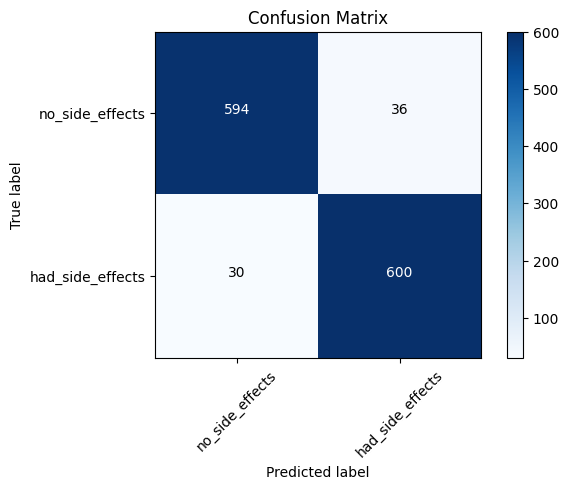

In [30]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# **Save and Load a Model**

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **1. model.save()*

In [34]:
# Checks first to see if file exists already.
# If not, the model is saved to disk.
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

C:\Users\Ramym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


This save functions saves:

- The architecture of the model, allowing to re-create the model.

- The weights of the model.

- The training configuration (loss, optimizer).

- The state of the optimizer, allowing to resume training exactly where you left off.
    

In [35]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [36]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
new_model.get_weights()

[array([[-0.09540451, -0.47535354,  0.565321  ,  0.6341445 ,  0.20624025,
          0.28826284,  0.25206465, -0.42084467, -0.27455753,  0.75704086,
         -0.3533653 , -0.5731787 ,  0.39296323, -0.5618934 ,  0.3771568 ,
          0.53474265]], dtype=float32),
 array([ 0.        ,  0.        , -0.02057759, -0.20774963, -0.09381977,
        -0.12542222, -0.11292715,  0.        ,  0.        , -0.09687498,
         0.        ,  0.        , -0.15228407,  0.        , -0.1487856 ,
        -0.16937062], dtype=float32),
 array([[-3.01712245e-01, -1.73811018e-02, -1.64245680e-01,
          3.31991225e-01, -3.30587059e-01, -1.67539194e-01,
          4.08720672e-02, -2.01097116e-01, -2.65888542e-01,
         -2.43242979e-02, -3.31680596e-01,  2.00282246e-01,
         -3.09979260e-01, -2.74188012e-01,  2.19687134e-01,
         -2.60247529e-01, -2.12300584e-01, -2.17603326e-01,
         -3.21987927e-01, -2.75703937e-01, -2.30211049e-01,
          3.31435412e-01,  6.68696761e-02, -2.39438355e-01,
 

In [38]:
new_model.optimizer

# *2. model.to_json()*

If you only need to save the architecture of a model, and not its weights or its training configuration, you can use the following function to save the architecture only.

In [39]:
# save as JSON
json_string = model.to_json()

# save as YAML
# yaml_string = model.to_yaml()

In [40]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 1], "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "registered_name": null, "build_config": {"input_shape": [null, 1]}}, {"module": "keras.layers", "class_name": "Dense", "config": {

In [41]:
# model reconstruction from JSON:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from tensofrlow.keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)

In [42]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# *3. model.save_Weights()*

In [43]:
# Chekcs first to see if file exists already.
# If not, the weights are save to disk.
import os.path
if os.path.isfile('models/my_model_weights.h5') is False:
    model.save_weights('models/my_model_weights.h5')


In [45]:
model12 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [46]:
model12.load_weights('models/my_model_weights.h5')

In [47]:
model12.get_weights()

[array([[-0.09540451, -0.47535354,  0.565321  ,  0.6341445 ,  0.20624025,
          0.28826284,  0.25206465, -0.42084467, -0.27455753,  0.75704086,
         -0.3533653 , -0.5731787 ,  0.39296323, -0.5618934 ,  0.3771568 ,
          0.53474265]], dtype=float32),
 array([ 0.        ,  0.        , -0.02057759, -0.20774963, -0.09381977,
        -0.12542222, -0.11292715,  0.        ,  0.        , -0.09687498,
         0.        ,  0.        , -0.15228407,  0.        , -0.1487856 ,
        -0.16937062], dtype=float32),
 array([[-3.01712245e-01, -1.73811018e-02, -1.64245680e-01,
          3.31991225e-01, -3.30587059e-01, -1.67539194e-01,
          4.08720672e-02, -2.01097116e-01, -2.65888542e-01,
         -2.43242979e-02, -3.31680596e-01,  2.00282246e-01,
         -3.09979260e-01, -2.74188012e-01,  2.19687134e-01,
         -2.60247529e-01, -2.12300584e-01, -2.17603326e-01,
         -3.21987927e-01, -2.75703937e-01, -2.30211049e-01,
          3.31435412e-01,  6.68696761e-02, -2.39438355e-01,
 